In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#to calculate percentage of null values in data
df.isnull().sum()/df.shape[0]*100

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [18]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [14]:
#check for null values
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df.loc[df.Amount.isnull(),:]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


0.5580257366658404


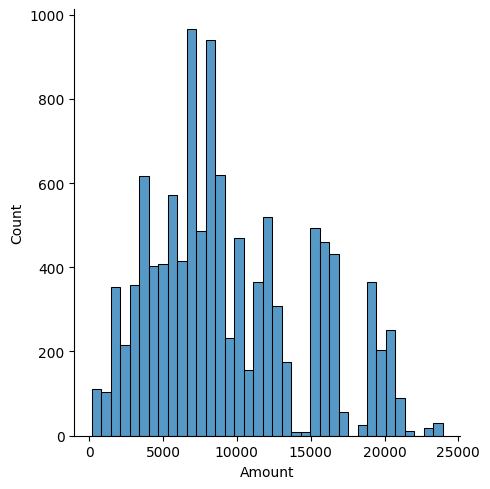

In [4]:
sns.displot(df.Amount)
print(df.Amount.skew())
plt.show()

In [20]:
df.loc[df.Amount.isnull(),"Amount"]=df.Amount.median()

In [21]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [7]:
df['Amount']=df['Amount'].astype('int')

In [8]:
df['Amount'].dtypes

dtype('int64')

In [9]:
df.Amount.unique()

for i in df.Amount.unique():
    print(i)

23952
23934
23924
23912
23877
23841
8109
23809
23799
23770
23752
23730
23718
23664
23619
23568
23546
23525
23518
23515
23513
23462
23456
23451
23434
23389
23365
23326
23314
23306
23302
23285
23281
23270
23267
23252
23247
23246
23239
23201
23185
23160
23154
23103
23066
23053
23047
21563
21547
21533
21503
21495
21463
21427
21423
21401
21397
21388
21325
21320
21317
21293
21266
21259
21246
21218
21178
21152
21079
21058
21039
21013
21009
20981
20967
20965
20963
20960
20959
20955
20951
20950
20949
20948
20945
20944
20943
20938
20933
20932
20930
20929
20928
20925
20920
20914
20912
20908
20906
20900
20896
20883
20875
20874
20873
20870
20867
20865
20863
20860
20855
20853
20852
20850
20847
20840
20837
20833
20819
20816
20815
20812
20807
20805
20796
20788
20783
20770
20767
20757
20752
20751
20745
20744
20739
20729
20714
20712
20707
20705
20691
20689
20688
20678
20677
20676
20673
20669
20668
20666
20665
20664
20661
20660
20659
20657
20654
20644
20642
20641
20628
20627
20623
20622
20620
20619
20615

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [11]:
#rename column
df.rename(columns={'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206,NaN,NaN


In [7]:
df.groupby(['Zone','State'])['State'].count()

Zone      State           
Central   Delhi               1107
          Madhya Pradesh       923
          Uttar Pradesh       1946
          Uttarakhand          320
Eastern   Bihar                434
          Jharkhand            380
Northern  Haryana              452
          Himachal Pradesh     608
          Punjab               200
          Rajasthan            231
Southern  Andhra Pradesh       812
          Karnataka           1305
          Kerala               453
          Telangana            125
Western   Gujarat              429
          Maharashtra         1526
Name: State, dtype: int64

In [8]:
#describe() method returns description of the data in the dataframe (i.e. count,mean,std,etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [10]:
#Use describe() for specific columns
df[['Age','Amount']].describe()

,Age,Amount
count,11251.000000,11239.000000
mean,35.421207,9453.610858
std,12.754122,5222.355869
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


In [ ]:
#anomalies- abnormal,something deviate from 

### Exploratory Data Analysis

### Gender

In [ ]:
#plotting a chart
plt.countplot

##### In above graph number females is higher than the male that means majority of our customers are women. 

<Axes: xlabel='Gender', ylabel='Amount'>

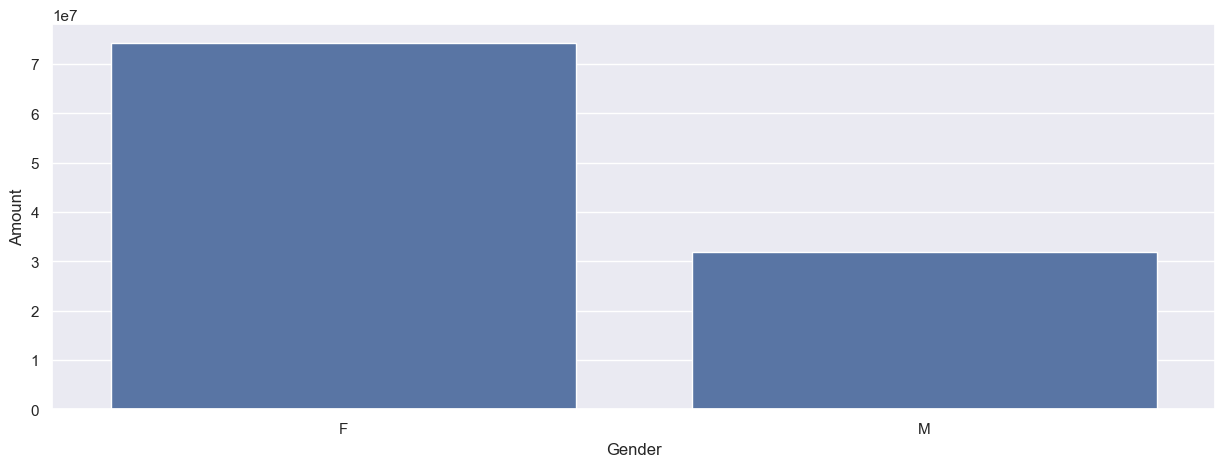

In [23]:
#plotting a bar chart for gender vs total amount
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum()
sns.barplot(x='Gender',y='Amount',data=sales_gen)

##### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men. 

### Age

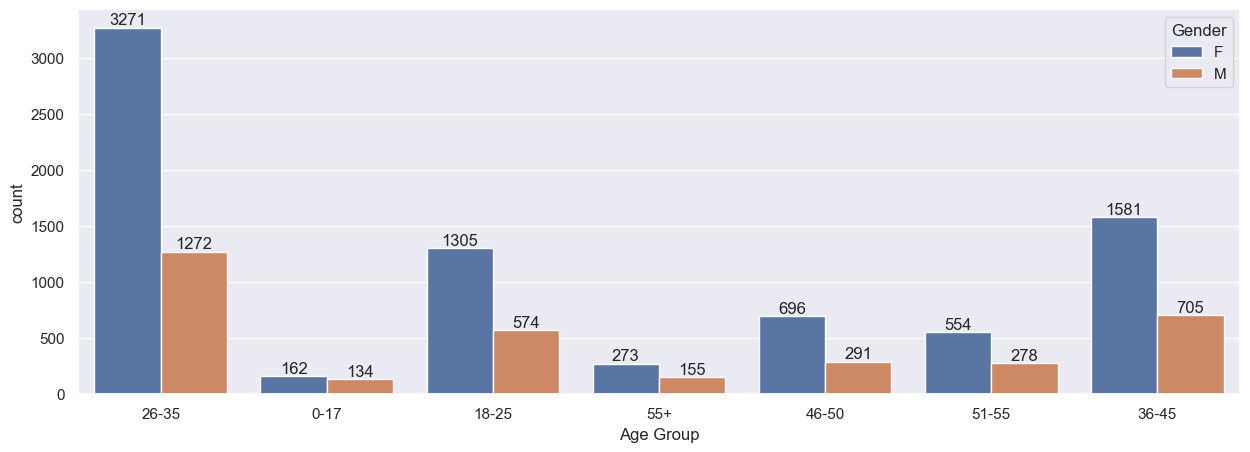

In [22]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Age Group', ylabel='Amount'>

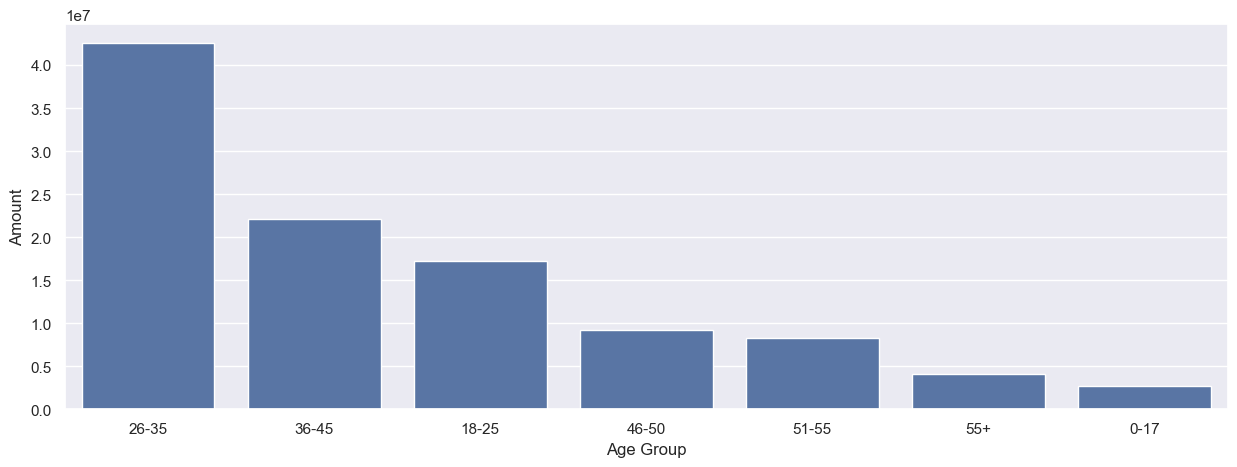

In [28]:
#Total amount vs Age group
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age)

In [20]:
sns.set(rc={'figure.figsize':(15,5)})

##### State

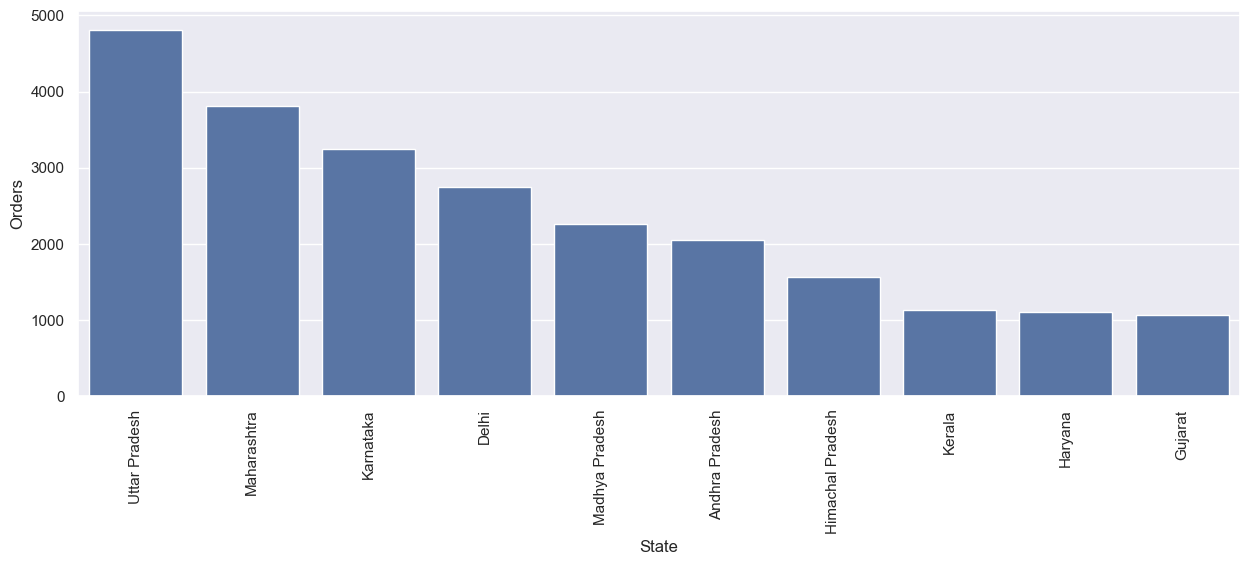

In [25]:
#Total number of orders from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum()\
.sort_values(by='Orders',ascending=False).head(10)

sns.barplot(data=sales_state,x='State',y='Orders')
plt.xticks(rotation=90)
plt.show()


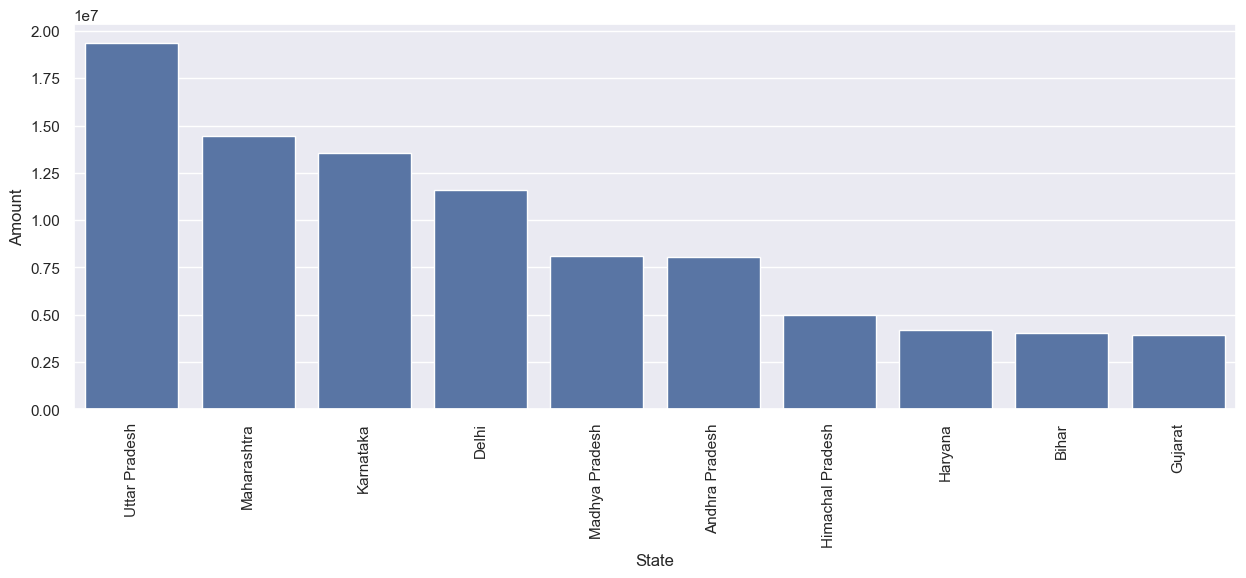

In [26]:
#Total amount/sales from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False).head(10)

sns.barplot(data=sales_state,x='State',y='Amount')
plt.xticks(rotation=90)
plt.show()

##### From above graphs we can see that most of the orders & total sales\amount are from Uttar Pradesh, Maharashtra and Karnatka respectively.

#### Marital Status

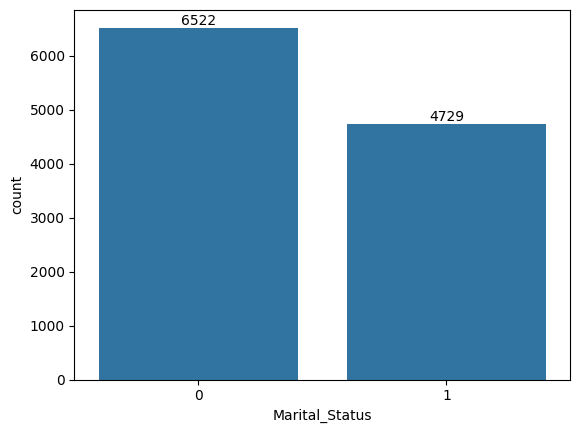

In [6]:
ax=sns.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

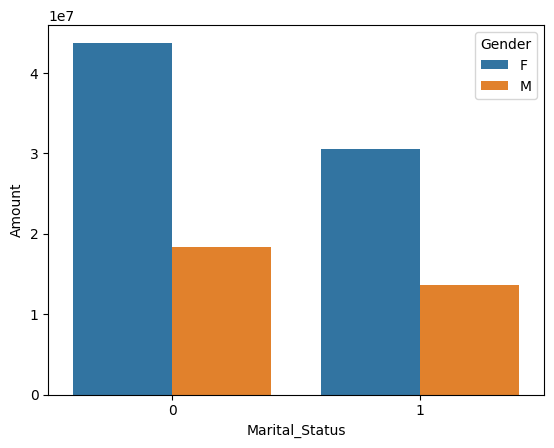

In [7]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

##### From above graph we can see most of the buyers are unmarried(women) and they have high purchasing power. 

#### Occupation

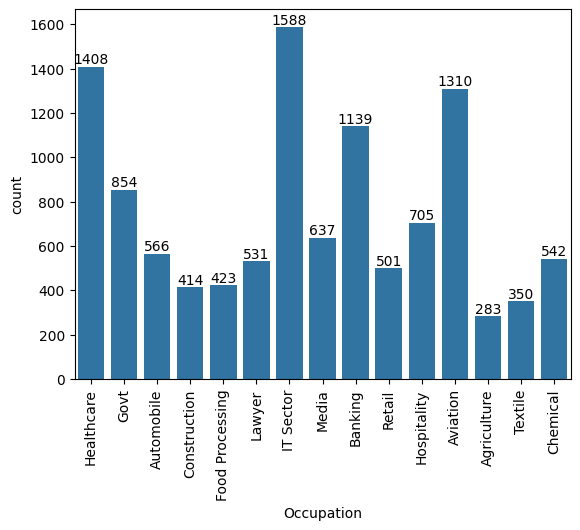

In [10]:
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90)
plt.show()

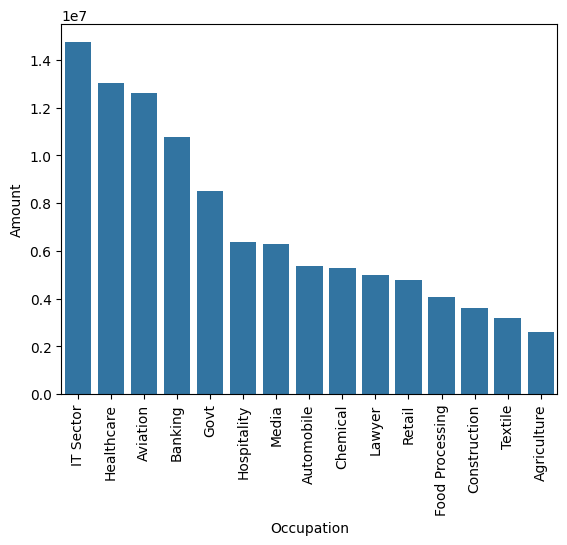

In [13]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_state,x='Occupation',y='Amount')
plt.xticks(rotation=90)
plt.show()


###### From above graphs we can see that most of the buyers are working in IT Sector,Healthcare and Aviation Sector.

##### Product Category

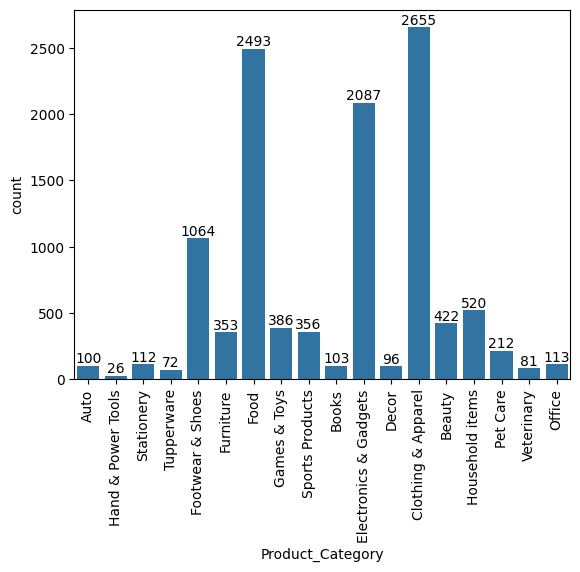

In [14]:
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90)
plt.show()

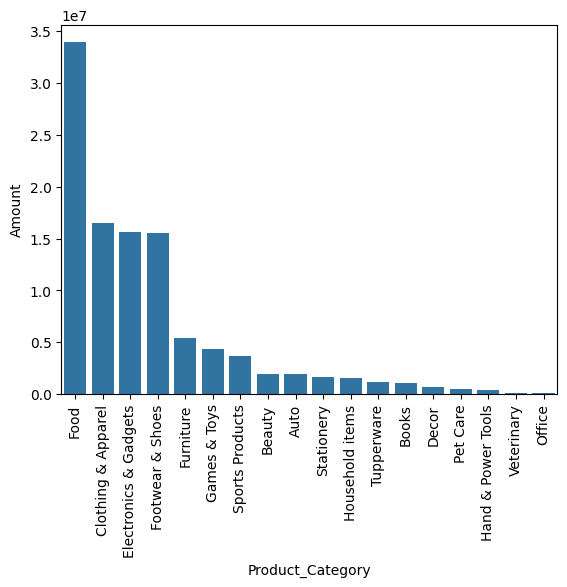

In [16]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum()\
.sort_values(by='Amount',ascending=False)

sns.set

sns.barplot(data=sales_state,x='Product_Category',y='Amount')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position of text
            p.get_height() + 900000,         # Y position of text (just above the bar)
            f'{p.get_height() / 1_000_000:.2f}M',  # Format value in millions
            ha='center',                    # Horizontal alignment
            va='center',                    # Vertical alignment
            fontsize=15)

plt.xticks(rotation=90)
plt.show()


##### From above graph we can see that most of the sold products are from Food, clothing and Electronics category.

In [20]:
df.groupby('Product_ID')['Orders'] .sum().nlargest(10)
##nsmallest()

Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00025442     79
P00114942     79
P00117942     76
P00145042     76
P00044442     75
P00110842     74
Name: Orders, dtype: int64

In [18]:
df.loc[df.Product_ID=="P00265242","Product_Category"].value_counts()

Product_Category
Food                     17
Clothing & Apparel       15
Electronics & Gadgets    11
Footwear & Shoes          3
Sports Products           2
Stationery                1
Furniture                 1
Games & Toys              1
Beauty                    1
Household items           1
Name: count, dtype: int64

<Axes: xlabel='Product_ID'>

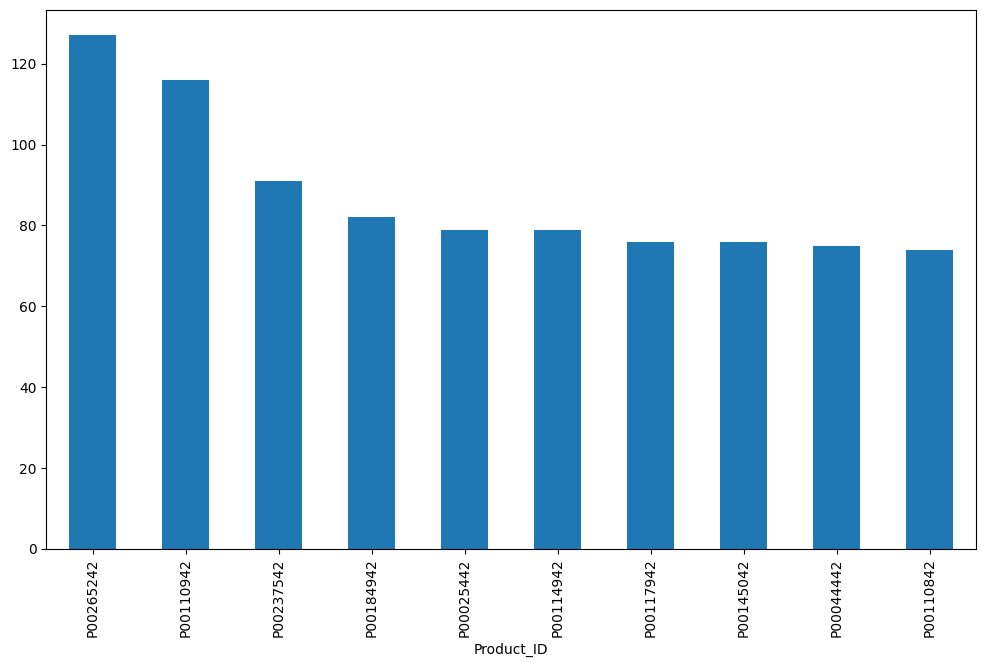

In [21]:
# top 10 most sold products (same thing as above)
plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

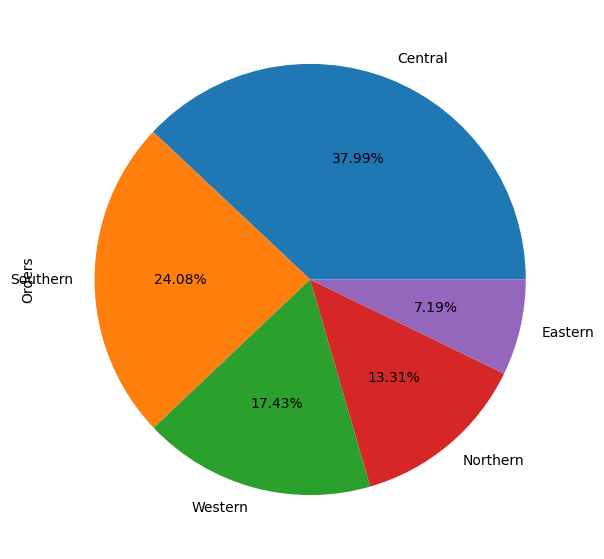

In [34]:
plt.subplots(figsize=(12,7))
df.groupby('Zone')['Orders'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%.2f%%')
plt.show() 

#### Conclusion

##### Unmarried women age group 26-35 yrs from UP, Maharastra and Karnatka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

#### Project Learning
* Performed data cleaning and manipulation.
* Performed exploratory data analysis(EDA) using Pandas, matplotlib and seaborn libraries.
* Improved customer experience by identifying potential customers across different states, occupation, gender and age groups.
* Improved sales by identifying most selling product categories and products, which can help plan inventory and hence meet the demands.